In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

# Kompresja obrazka z użyciem PCA

In [2]:
# Wczytanie obrazka
img = mpimg.imread('cat.png')

## Obrazek wejściowy

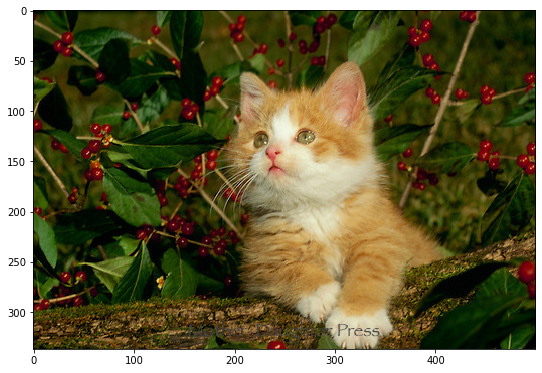

In [3]:
fig1 = plt.figure(figsize = (9, 9))
ax1 = fig1.add_subplot(111)
ax1.imshow(img, interpolation='none')

In [4]:
# Obraz w formie macierzy
img

array([[[0.        , 0.00784314, 0.00392157],
        [0.00392157, 0.00784314, 0.02352941],
        [0.01176471, 0.01176471, 0.01960784],
        ...,
        [0.09803922, 0.16078432, 0.01960784],
        [0.14509805, 0.19215687, 0.05098039],
        [0.19215687, 0.23529412, 0.07843138]],

       [[0.05098039, 0.00392157, 0.00392157],
        [0.03137255, 0.00784314, 0.02352941],
        [0.01568628, 0.02352941, 0.01960784],
        ...,
        [0.04313726, 0.11764706, 0.        ],
        [0.07058824, 0.12941177, 0.        ],
        [0.10196079, 0.15686275, 0.01960784]],

       [[0.15686275, 0.00392157, 0.02352941],
        [0.09803922, 0.00784314, 0.03137255],
        [0.03137255, 0.02745098, 0.01960784],
        ...,
        [0.01176471, 0.10588235, 0.00392157],
        [0.01960784, 0.09803922, 0.        ],
        [0.03921569, 0.11372549, 0.        ]],

       ...,

       [[0.21568628, 0.16078432, 0.02352941],
        [0.28627452, 0.25490198, 0.01176471],
        [0.2509804 , 0

In [5]:
# Poniżej odpowiednio ilość wierszy, kolumn i kanałów (obrazek jest w kolorze)
print(img.shape)

(337, 500, 3)


In [6]:
# Przekształcenie obrazka do macierzy 2D.
# Łączenie szerokości obrazka z kanałami w jeden wymiar.
# 1500 = 500 * 3
img_r = np.reshape(img, (337, 1500)) 
print(img_r.shape)

(337, 1500)


## Wybór liczby komponentów

Text(0, 0.5, 'Cumulative explained variance')

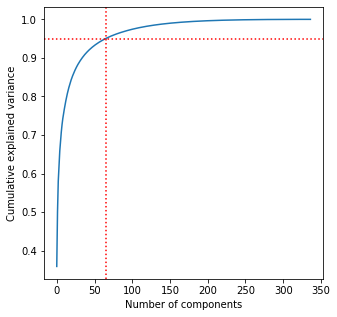

In [7]:
# Wizualizacja skumulowanej wartości wariancji w zależności od liczby komponentów.
fig2 = plt.figure(figsize = (5, 5))
pca = PCA().fit(img_r)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, color = "red", ls = ":")
plt.axvline(65, color = "red", ls = ":")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Z wykresu można odczytać, że ok. 65 pierwszych czynników może wyjaśnić ponad 95% całkowitej wariancji.

In [8]:
# Weryfikacja powyższego wniosku
pca = PCA(0.95) 
img_comp = pca.fit_transform(img_r)
print(img_comp.shape)

(337, 66)


Zatem, w celu uzyskania dolnego ograniczenia wariancji na poziomie 95% musimy zachować co najmniej 66 głównych składowych

## Realizacja PCA

In [9]:
# PCA
pca = PCA(66).fit(img_r)
img_c = pca.transform(img_r)

## Efekt redukcji wymiarowości

In [10]:
results = pd.DataFrame({'Przed PCA': [img_r.size, img_r.shape], 'Po PCA': [img_c.size, img_c.shape]})
indexes = pd.Series(["Rozmiar obrazka", "Wymiary macierzy"])
results.set_index([indexes])

,Przed PCA,Po PCA
Rozmiar obrazka,505500,22242
Wymiary macierzy,"(337, 1500)","(337, 66)"


In [11]:
print(f"\n Rzeczywisty odsetek wariancji, który został zachowany wynosi {np.sum(pca.explained_variance_ratio_)}. \n Jak wynika z powyższego zestawienia, w efekcie przeprowadzenia analizy głównych składowych, obrazek zmniejszył \n swoją objętość ok. {round(img_r.size/img_c.size, 1)} raza. Przy czym spadek jakości ilustracji jest widoczny gołym okiem.")



 Rzeczywisty odsetek wariancji, który został zachowany wynosi 0.9502115845680237. 
 Jak wynika z powyższego zestawienia, w efekcie przeprowadzenia analizy głównych składowych, obrazek zmniejszył 
 swoją objętość ok. 22.7 raza. Przy czym spadek jakości ilustracji jest widoczny gołym okiem.


## Wizualizacja rezultatów

In [12]:
# Transformacja w celu wizualizacji rezultatów.
temp = pca.inverse_transform(img_c) 
trans = np.reshape(temp, (337, 500, 3)) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


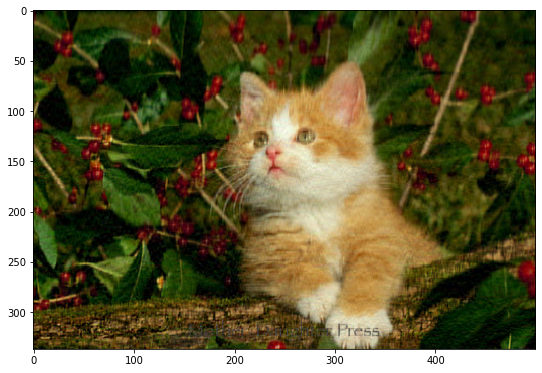

In [13]:
fig2 = plt.figure(figsize = (9, 9))
ax2 = fig2.add_subplot(111)
ax2.imshow(trans, interpolation='none')

# Zadanie dodatkowe

In [19]:
# Wczytanie danych
data = pd.read_csv("signals.tsv", delimiter = "\t")
data = np.array(data.drop('time', axis = 1))

## Realizacja ICA

In [20]:
ica = FastICA(n_components = 4)
X = ica.fit_transform(data)

## Realizacja PCA dla porównania

In [21]:
pca = PCA(n_components = 4)
Y = pca.fit_transform(data) 

## Wizualizacja rezultatów

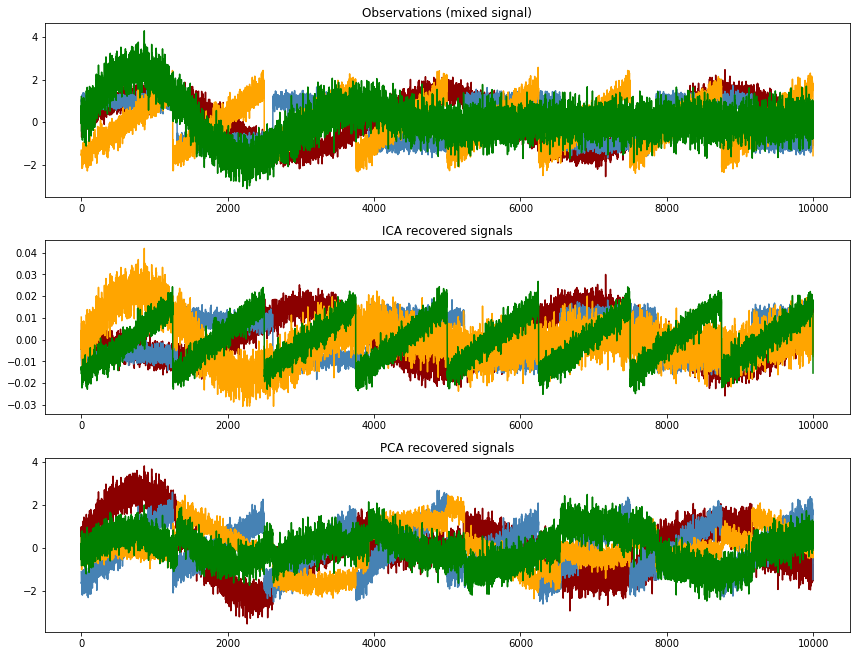

In [22]:
fig = plt.figure(figsize = (12, 12))
models = [data, X, Y]
# PCA dla porównania
names = ['Observations (mixed signal)',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['darkred', 'steelblue', 'orange', 'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.tight_layout()
plt.show()

Zatem oryginalne pomiary zadane są przez X.

In [23]:
OriginalObs = pd.DataFrame(X)
OriginalObs.columns = ['Signal_1', 'Signal_2', 'Signal_3', 'Signal_4']
OriginalObs.head()

,Signal_1,Signal_2,Signal_3,Signal_4
0,-0.000765,0.001310,0.010317,-0.013835
1,-0.004587,-0.008022,-0.004540,-0.012379
2,0.003490,-0.009499,0.004367,-0.015813
3,-0.000675,-0.009830,-0.001942,-0.014223
4,-0.004577,-0.010128,-0.008652,-0.014034
